In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import seaborn as sns
import numpy as np

%matplotlib inline

# Load Datasets

In [3]:
# Base raw URL from GitHub (must be the "raw" version)
base_url = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/'

demo= 'df_final_demo.txt'
clients ='df_final_experiment_clients.txt'
web1= 'df_final_web_data_pt_1.txt'
web2= 'df_final_web_data_pt_2.txt'

df_demo = pd.read_csv(base_url + demo, delimiter=',')
df_client = pd.read_csv(base_url + clients, delimiter=',')
df_web1 = pd.read_csv(base_url + web1, delimiter=',')
df_web2 = pd.read_csv(base_url + web2, delimiter=',')

# Merge web data
df_web = pd.concat([df_web1, df_web2], ignore_index=True)

### Cleaning functions application

In [5]:
from cleaning_functions_05 import main_cleaning
main_cleaning(df_demo)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [6]:
from cleaning_functions_05 import apply_to_column, standardize_gender

df_demo = apply_to_column(df_demo, 'gender', standardize_gender)


In [7]:
from cleaning_functions_05 import conv_datetime, merge_datasets

# Then call directly:
df_web = conv_datetime(df_web)


### Quick_data_reports

In [9]:
from cleaning_functions_05 import quick_data_report
quick_data_report(df_demo)


DataFrame shape: (70609, 9)

Data types:
 client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gender               object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

Missing values:
 client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gender               0
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

Descriptive statistics:
           client_id  clnt_tenure_yr  clnt_tenure_mnth      clnt_age  \
count  7.060900e+04    70595.000000      70595.000000  70594.000000   
mean   5.004992e+06       12.052950        150.659367     46.442240   
std    2.877278e+06        6.871819         82.089854     15.591273   
min    1.690000e+02        2.000000         33.000000     13.500000   
25%    2.519329e+06        6.000000         82.000000     32.500000   
5

In [10]:
from cleaning_functions_05 import quick_data_report
quick_data_report(df_client)


DataFrame shape: (70609, 2)

Data types:
 client_id     int64
Variation    object
dtype: object

Missing values:
 client_id        0
Variation    20109
dtype: int64

Descriptive statistics:
           client_id
count  7.060900e+04
mean   5.004992e+06
std    2.877278e+06
min    1.690000e+02
25%    2.519329e+06
50%    5.016978e+06
75%    7.483085e+06
max    9.999839e+06


In [11]:
from cleaning_functions_05 import quick_data_report
quick_data_report(df_web)


DataFrame shape: (755405, 5)

Data types:
 client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

Missing values:
 client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Descriptive statistics:
           client_id                      date_time
count  7.554050e+05                         755405
mean   5.013632e+06  2017-05-07 22:36:27.471852544
min    1.690000e+02            2017-03-15 00:03:03
25%    2.519882e+06            2017-04-08 21:14:52
50%    5.033441e+06            2017-05-11 16:47:34
75%    7.496063e+06            2017-06-03 11:02:51
max    9.999875e+06            2017-06-20 23:59:57
std    2.879152e+06                            NaN


# Handle Missing Values

In [13]:
df_demo.dropna(inplace=True)

In [14]:
df_client['Variation'].unique()

array(['Test', 'Control', nan], dtype=object)

In [15]:
df_client['Variation']= df_client['Variation'].dropna()

# Merge datasets

In [17]:
# Merge all three
df_final = merge_datasets(df_demo, df_client, df_web)

# Quick check
print(df_final.shape)
df_final.head()

(449704, 14)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,u,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,u,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,u,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,u,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,u,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


#### Answer the following questions about demographics:

Who are the primary clients using this online process? 

- Are the primary clients younger or older, new or long-standing?

- Next, carry out a client behaviour analysis to answer any additional relevant questions you think are important.

#### We define primary users as those who:

Have high login frequency (logons_6_mnth)

Progress through **multiple 'process_steps'

Possibly have repeated web activity (visit_id or visitor_id)

### 1.1. Compare login frequency by age group:


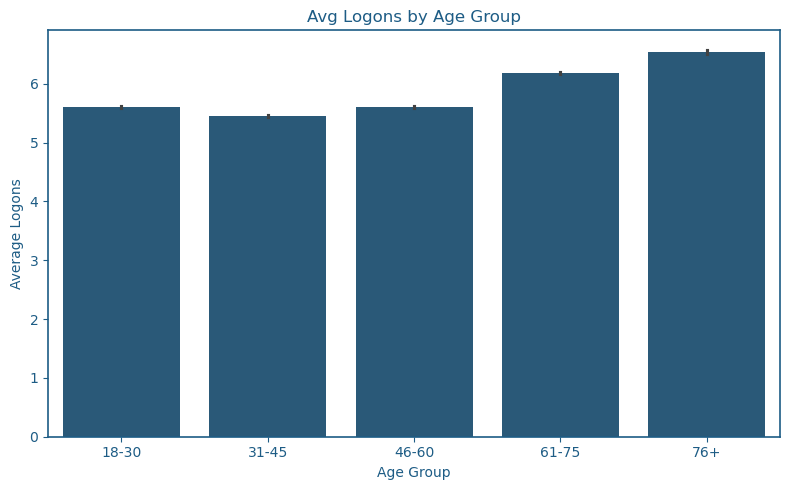

In [36]:
bins = [18, 30, 45, 60, 75, 100]
labels = ['18-30', '31-45', '46-60', '61-75', '76+']
df_final['age_group'] = pd.cut(df_final['clnt_age'], bins=bins, labels=labels, include_lowest=True)

theme_color = "#1d5c85"  # Your preferred color

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=df_final,
    x='age_group',
    y='logons_6_mnth',
    color=theme_color,  
    ax=ax
)

# Step 3: Styling for presentation
ax.set_title('Avg Logons by Age Group', color=theme_color)
ax.set_xlabel('Age Group', color=theme_color)
ax.set_ylabel('Average Logons', color=theme_color)
ax.tick_params(colors=theme_color)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color(theme_color)

plt.tight_layout()
plt.savefig("../slides/avg_logons_by_age.png", transparent=True, format="png")
plt.show()# Discretizing 'age' into 4 categories



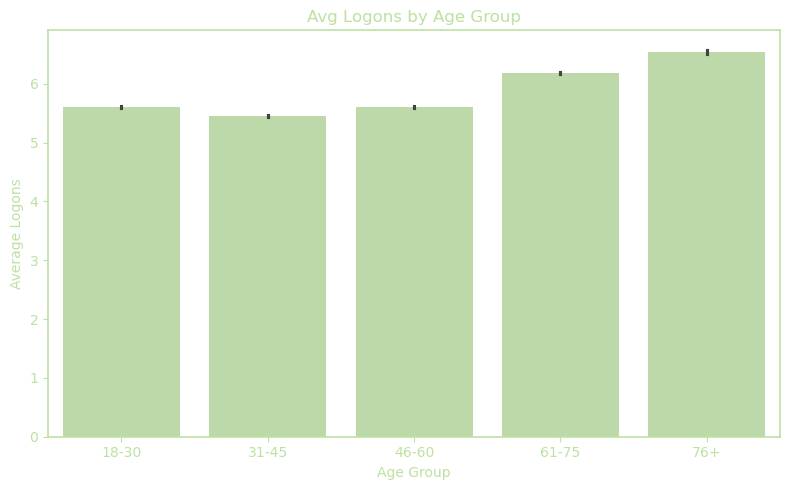

In [37]:
# Step 2: Plot using Seaborn

theme_color = "#bce1a2"

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=df_final, x='age_group', y='logons_6_mnth', color=theme_color, ax=ax)

# Step 3: Styling for presentation
ax.set_title('Avg Logons by Age Group', color=theme_color)
ax.set_xlabel('Age Group', color=theme_color)
ax.set_ylabel('Average Logons', color=theme_color)
ax.tick_params(colors=theme_color)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color(theme_color)

plt.tight_layout()
plt.savefig("../slides/avg_logons_by_age.png", transparent=True, format="png")
plt.show()


### 1.2. Compare login frequency by tenure:


In [40]:
#1.2. Compare login frequency by tenure:
df_final['tenure_years'] = df_final['clnt_tenure_yr'] + df_final['clnt_tenure_mnth'] / 12
df_final['tenure_group'] = pd.cut(df_final['tenure_years'], bins=[0, 2, 5, 10, 20, 40], labels=['<2y', '2-5y', '5-10y', '10-20y', '20y+'])

df_tenure = df_final.groupby('tenure_group', observed= True)['logons_6_mnth'].mean().reset_index()


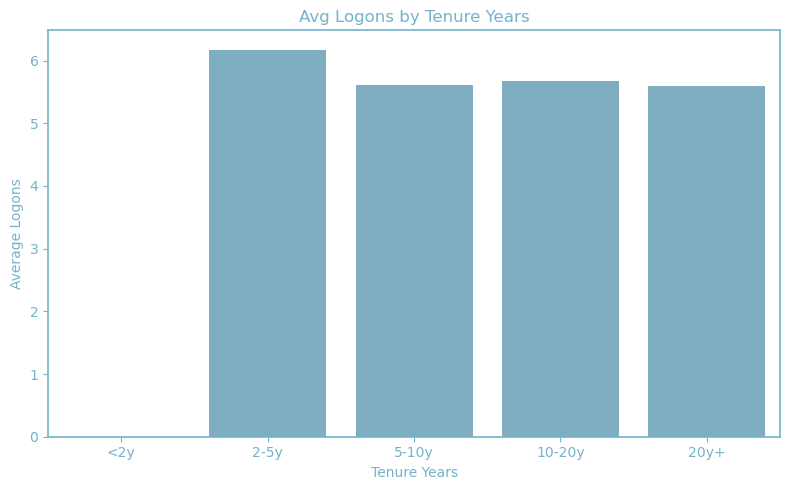

In [44]:
# Generate cubehelix palette with ENOUGH colors
theme_color = "#73b3cb"
# Plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=df_tenure,
    x='tenure_group',
    y='logons_6_mnth',
    color=theme_color,
    legend=False,                 
    ax=ax
)

# Theme styling

ax.set_title('Avg Logons by Tenure Years', color=theme_color)
ax.set_xlabel('Tenure Years', color=theme_color)
ax.set_ylabel('Average Logons', color=theme_color)
ax.tick_params(colors=theme_color)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color(theme_color)

plt.tight_layout()
plt.savefig("../slides/avg_logons_by_tenure.png", transparent=True, format="png")
plt.show()


# 2.Client Behaviour Analysis
#### 2.1. Do high-balance clients engage more digitally?
#### 2.2 Do highly engaged digital clients call less?
#### 2.3. How many process steps do they complete?

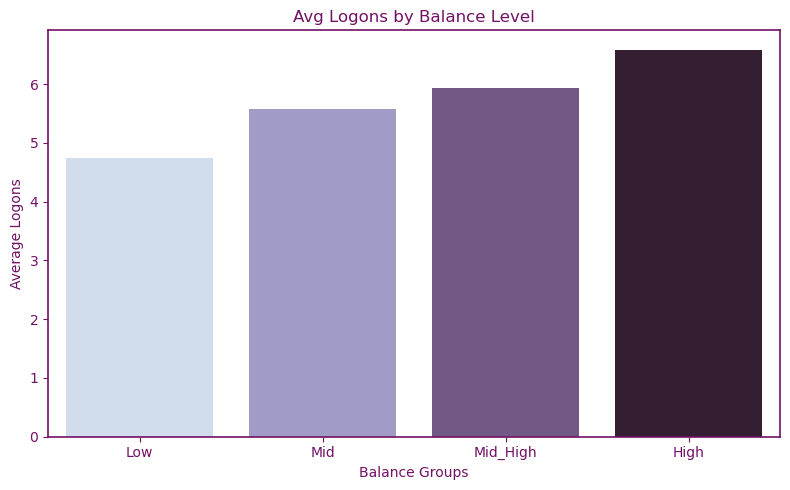

In [46]:
# 2.1 Balance group and engagement digitally
df_final['balance_group'] = pd.qcut(df_final['bal'], q=4, labels=['Low', 'Mid', 'Mid_High', 'High'])
df_balances = df_final.groupby('balance_group', observed=True)['logons_6_mnth'].mean().reset_index()

# Generate cubehelix palette
cubehelix_colors = sns.cubehelix_palette(start=.6, rot=-.32, n_colors=len(df_balances))

# Plot using Seaborn
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=df_balances,
    x='balance_group',
    y='logons_6_mnth',
    hue='balance_group',              
    palette=cubehelix_colors,
    legend=False,                    
    ax=ax
)

# Style elements
theme_color = "#711164"
ax.set_title('Avg Logons by Balance Level', color=theme_color)
ax.set_xlabel('Balance Groups', color=theme_color)
ax.set_ylabel('Average Logons', color=theme_color)
ax.tick_params(colors=theme_color)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color(theme_color)

plt.tight_layout()
plt.savefig("../slides/avg_logons_by_balance.png", transparent=True, format="png")
plt.show()



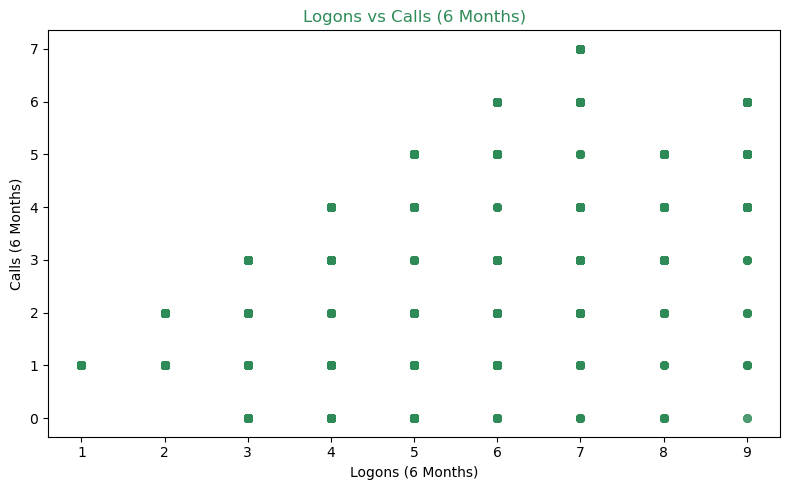

In [84]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df_final,
    x='logons_6_mnth',
    y='calls_6_mnth',
    alpha=0.3,           # Transparency to handle overlap
    color='seagreen',
    edgecolor=None
)



plt.title("Logons vs Calls (6 Months)", color='seagreen')
plt.xlabel("Logons (6 Months)")
plt.ylabel("Calls (6 Months)")
plt.tight_layout()
plt.savefig("../slides/logons_vs_calls_light.png", transparent=True, format="png")
plt.show()



In [49]:
#2.3.How many process steps do they complete?
# Count how many unique process steps each client completed
df_steps = df_final.groupby('client_id')['process_step'].nunique().sort_values(ascending=False).reset_index()
df_steps.columns = ['client_id', 'steps_completed']

#Merge steps back into the full dataset
df_final = df_final.merge(df_steps, on='client_id', how='left')
df_final['steps_completed'].fillna(0)




0         5
1         5
2         5
3         5
4         5
         ..
449699    5
449700    5
449701    5
449702    5
449703    5
Name: steps_completed, Length: 449704, dtype: int64

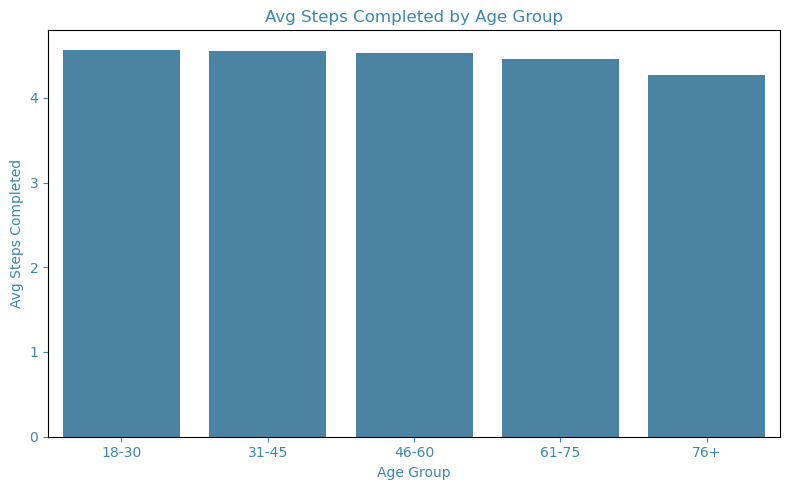

In [90]:
# Step 1: Calculate average steps by age group
steps_by_age = (
    df_final
    .groupby('age_group', observed=True)['steps_completed']
    .mean()
    .sort_values(ascending=False) 
    .reset_index()
)

# Step 2: Generate cubehelix palette (dark for high values)

# Step 3: Create the barplot with sorted data and mapped colors
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=steps_by_age,
    x='age_group',
    y='steps_completed',
    color='#3d88b0',
    ax=ax
)

# Step 4: Style the plot
ax.set_title('Avg Steps Completed by Age Group', color="#3d88b0")
ax.set_xlabel('Age Group', color="#3d88b0")
ax.set_ylabel('Avg Steps Completed', color="#3d88b0")
ax.tick_params(colors="#3d88b0")



plt.tight_layout()
plt.savefig("../slides/avaragestepsbyage.png", transparent=True, format="png")
plt.show()

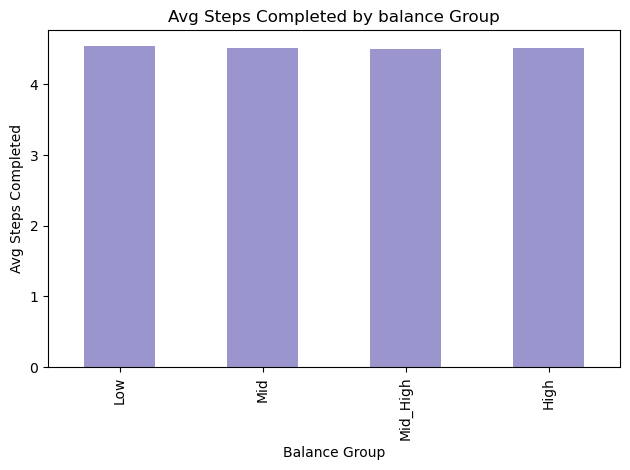

In [128]:
#2.4. Completed process by balance group
cubehelix_colors = sns.cubehelix_palette(start=.6, rot=-.32, n_colors=len(df_balances))

# Plot: Average number of steps completed per balance group
df_final.groupby('balance_group', observed=True)['steps_completed'].mean().plot(
    kind='bar',
    title='Avg Steps Completed by balance Group',
    color=cubehelix_colors[1]
)

plt.ylabel('Avg Steps Completed')
plt.xlabel('Balance Group')
plt.tight_layout()
plt.savefig("../slides/av_steps_by_balance.png", transparent=True, format="png")
plt.show()


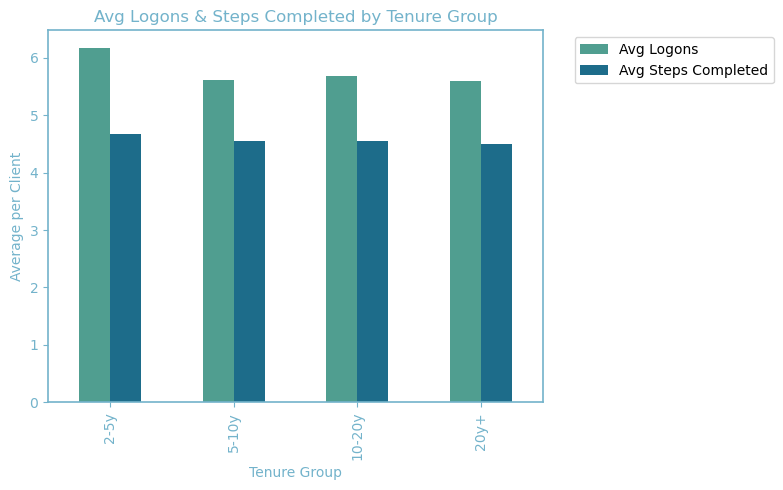

In [114]:
# Get 2 matching colors from the "crest" palette
colors = sns.color_palette("crest", n_colors=2)

# Grouped mean
grouped = df_final.groupby('tenure_group', observed=True)[['logons_6_mnth', 'steps_completed']].mean()

# Plot
ax = grouped.plot(kind='bar', color=colors, figsize=(8, 5))

# Styling
ax.set_title('Avg Logons & Steps Completed by Tenure Group', color='#73b3cb')
ax.set_xlabel('Tenure Group', color='#73b3cb')
ax.set_ylabel('Average per Client', color='#73b3cb')
ax.tick_params(colors='#73b3cb')

# Legend
plt.legend(['Avg Logons', 'Avg Steps Completed'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Spine and layout tweaks
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color('#73b3cb')

plt.tight_layout()
plt.savefig("../slides/av_steps_by_tenure.png", transparent=True, format="png")
plt.show()


### KPI / Metrics

1- Completion Rate: The proportion of users who reach the final 'confirm' step.

2- Time Spent on Each Step: The average duration users spend on each step.

3- Error Rates: If there's a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [55]:
# Count how many unique process steps each client completed
df_steps = df_final.groupby('client_id')['process_step'].nunique().reset_index()
df_steps.columns = ['client_id', 'steps_completed']
filtered_steps = df_steps[df_steps['steps_completed'] == 5]
filtered_steps.nunique() 

client_id          46968
steps_completed        1
dtype: int64

## 1-Completion Rate: The proportion of users who reach the final 'confirm' step.

In [57]:
# Step 1: Identify clients who reached the 'confirm' step
completed_clients = df_final[df_final['process_step'] == 'confirm']['client_id'].unique()

# Step 2: Count the number of unique clients who completed the 'confirm' step
num_completed_clients = len(completed_clients)

# Step 3: Calculate the total number of unique clients
total_clients = df_final['client_id'].nunique()

# Step 4: Calculate the completion rate
completion_rate = num_completed_clients / total_clients

# Display the result
print(f"Completion Rate: {completion_rate:.2f}")

Completion Rate: 0.68


## 2- Time Spent on Each Step: The average duration users spend on each step.

In [135]:
# Step 1: Sort by client_id and date_time
df_final_sorted = df_final.sort_values(by=['client_id', 'date_time']).copy()

# Step 2: Calculate time difference to next step
df_final_sorted['next_date_time'] = df_final_sorted.groupby('client_id')['date_time'].shift(-1)
df_final_sorted['duration'] = (df_final_sorted['next_date_time'] - df_final_sorted['date_time']).dt.total_seconds() / 60

# Step 3: Remove rows with no next step (NaN durations)
duration_df = df_final_sorted.dropna(subset=['duration'])

# Step 4: Average time per process step
average_time_per_step = (
    duration_df
    .groupby('process_step')['duration']
    .mean()
    .reset_index()
    .rename(columns={'duration': 'average_duration_minutes'})
    .sort_values(by='average_duration_minutes', ascending=False)
)
# Export duration per step 
average_time_per_step.to_csv("average_time_per_step.csv", index=False)

print(average_time_per_step)


  process_step  average_duration_minutes
0      confirm               5577.242426
1        start               1843.875330
2       step_1                824.841538
4       step_3                777.592230
3       step_2                452.595677


## 3- Error Rates: If there's a step where users go back to a previous step, it may indicate confusion or an error. 
- You should consider moving from a later step to an earlier one as an error.

In [139]:
# Step 1: Define step order
step_order = {'start': 1, 'step1': 2, 'step2': 3, 'step3': 4, 'confirm': 5}
df_final['step_order'] = df_final['process_step'].map(step_order)

# Step 2: Sort by client_id and date_time to analyze transitions
df_final.sort_values(by=['client_id', 'date_time'], inplace=True)

# Step 3: Calculate if a transition is an error (moving to a previous step)
df_final['next_step_order'] = df_final.groupby('client_id')['step_order'].shift(-1)
df_final['is_error'] = df_final['next_step_order'] < df_final['step_order']

# Step 4: Calculate error rate per client or overall
error_rate_per_client = df_final.groupby('client_id')['is_error'].mean().reset_index()
overall_error_rate = df_final['is_error'].mean()
error_rate_counts = df_final['is_error'].value_counts()
# Display the results
print(error_rate_counts)
print()
print("Error Rate per Client:")
print()
print(error_rate_per_client)
print(f"\nOverall Error Rate: {overall_error_rate:.2f}")

df_final.to_csv("step_errors.csv", index=False)




is_error
False    446439
True       3265
Name: count, dtype: int64

Error Rate per Client:

       client_id  is_error
0            169       0.0
1            555       0.0
2            647       0.0
3            722       0.0
4            934       0.0
...          ...       ...
70589    9999400       0.0
70590    9999626       0.0
70591    9999729       0.0
70592    9999832       0.0
70593    9999839       0.0

[70594 rows x 2 columns]

Overall Error Rate: 0.01


##### An A/B test was set into motion from 3/15/2017 to 6/20/2017 by the team.

##### Control Group: Clients interacted with Vanguard's traditional online process.
##### Test Group: Clients experienced the new, spruced-up digital interface.
##### Both groups navigated through an identical process sequence: an initial page, three subsequent steps, and finally, a confirmation page signaling process completion.


## The goal is to see if the new design leads to a better user experience and higher process completion rates.




In [63]:
# Step 1: Identify successful clients (those who reached the 'confirm' step)
df_final['success'] = df_final['process_step'] == 'confirm'

# Step 2: Calculate total and successful clients per group
group_success = df_final.groupby('Variation').agg(total_clients=('client_id', 'nunique'),
                                        successful_clients=('success', 'sum')).reset_index()

# Step 3: Calculate the success rate
group_success['success_rate'] = group_success['successful_clients'] / group_success['total_clients']

# Display the results
print(group_success)

  Variation  total_clients  successful_clients  success_rate
0   Control          23526               17498      0.743773
1      Test          26961               25716      0.953822


In [64]:
# Of all clients who started the process, how many reached step 1?

## Hypotheses Testing
* Variation: "Control" and "Test" (or "A" and "B")
* success: 1 = client completed the process, 0 = did not

 
### Null Hypothesis (H₀):
The completion rate is the same for both the Test and Control groups.
Mathematically: p₁ = p₂


### Alternative Hypothesis (H₁):
The Test group has a higher completion rate than the Control group.
Mathematically: p₁ < p₂ (one-tailed test)


In [66]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Step 1: Aggregate data
group_success = df_final.groupby('Variation').agg(
    total_clients=('client_id', 'nunique'),
    successful_clients=('success', 'sum')
).reset_index()

# Step 1.5: Filter to only Test and Control groups (drop unknowns)
group_success = group_success[group_success['Variation'].isin(['Control', 'Test'])]

# Step 2: Extract counts for Z-test
success_counts = group_success['successful_clients'].values
total_counts = group_success['total_clients'].values

# Step 3: Run one-tailed proportions Z-test (Test > Control)
z_stat, p_value = proportions_ztest(count=success_counts, nobs=total_counts, alternative='larger')

# Step 4: Output the test results
print(f"\nZ-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.2f}")

# Step 5: Hypothesis Test Interpretation
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis — the Test group has a significantly higher completion rate.")
else:
    print("Result: Fail to reject the null hypothesis — no significant difference found.")




Z-statistic: -67.05
P-value: 1.00
Result: Fail to reject the null hypothesis — no significant difference found.


In [67]:
# Business Threshold Check
# Calculate actual conversion rates
conversion_rates = group_success['successful_clients'] / group_success['total_clients']
rate_control = conversion_rates[group_success['Variation'] == 'Control'].values[0]
rate_test = conversion_rates[group_success['Variation'] == 'Test'].values[0]

# Calculate lift
lift = rate_test - rate_control
print(f"\nCompletion Rate - Control: {rate_control:.2%}")
print(f"Completion Rate - Test: {rate_test:.2%}")
print(f"Absolute Lift: {lift:.2%}")

# Step 7: Cost-effectiveness threshold evaluation
threshold = 0.05  # 5% minimum required improvement
if lift >= threshold:
    print("Result: The observed lift meets the 5% cost-effectiveness threshold.")
else:
    print("Result: The observed lift does NOT meet the 5% cost-effectiveness threshold.")



Completion Rate - Control: 74.38%
Completion Rate - Test: 95.38%
Absolute Lift: 21.00%
Result: The observed lift meets the 5% cost-effectiveness threshold.


## Each step completion rate
##### Started” → clients who appear at the very first recorded step for their journey

##### Reached step 1” → explicitly filtered process_step == 1

In [69]:
#Identify the first recorded activity for each client
###first_steps will contain the earliest process_step for each client_id, based on the chronological order provided by date_time.
first_steps = df_final.sort_values(['client_id', 'date_time']).groupby('client_id').first().reset_index()

In [130]:
df_final['process_step'].unique()

array(['start', 'step_1', 'step_2', 'step_3', 'confirm'], dtype=object)

## START TO STEP1

In [133]:
# Step 1: Clients who started at 'start' with variation info
clients_started = first_steps[first_steps['process_step'] == 'start'][['client_id', 'Variation']]

# Step 2: Clients from that group who reached 'step_1'
clients_step1 = df_final[
    (df_final['process_step'] == 'step_1') & 
    (df_final['client_id'].isin(clients_started['client_id']))
][['client_id']].drop_duplicates()

# Step 3: Add variation info to those who reached step_1
clients_step1 = clients_step1.merge(clients_started, on='client_id', how='left')

# Step 4: Grouped counts
grouped_start = clients_started.groupby('Variation')['client_id'].nunique()
grouped_step1 = clients_step1.groupby('Variation')['client_id'].nunique()

# Step 5: Completion rate from 'start' to 'step_1'
completion_rate_by_var = (grouped_step1 / grouped_start).fillna(0)

# Step 6: Print results
for var in completion_rate_by_var.index:
    print(f"\nVariation Group: {var}")
    print(f"Clients who started at 'start': {grouped_start[var]}")
    print(f"Clients who reached 'step_1': {grouped_step1[var]}")
    print(f"Completion rate from 'start' to 'step_1': {completion_rate_by_var[var]:.2%}")



Variation Group: Control
Clients who started at 'start': 23360
Clients who reached 'step_1': 20048
Completion rate from 'start' to 'step_1': 85.82%

Variation Group: Test
Clients who started at 'start': 26613
Clients who reached 'step_1': 24141
Completion rate from 'start' to 'step_1': 90.71%


## STEP1 TO STEP 2

In [ ]:
# Clients who reached 'step_1' with variation info
clients_step1 = df_final[df_final['process_step'] == 'step_1'][['client_id', 'Variation']].drop_duplicates()

#  Clients from that set who also reached 'step_2'
clients_step2 = df_final[df_final['process_step'] == 'step_2'][['client_id', 'Variation']].drop_duplicates()

#  Group counts by variation
step1_counts = clients_step1.groupby('Variation')['client_id'].nunique()
step2_counts = clients_step2.groupby('Variation')['client_id'].nunique()

#  Completion rate
step1_to_step2_rates = (step2_counts / step1_counts).fillna(0)

# Print results
for var in step1_to_step2_rates.index:
    print(f"\nVariation Group: {var}")
    print(f"Clients who reached 'step_1': {step1_counts[var]}")
    print(f"Clients who reached 'step_2': {step2_counts[var]}")
    print(f"Completion rate from 'step_1' to 'step_2': {step1_to_step2_rates[var]:.2%}")


## Step2 to Step 3

In [ ]:
# Clients who reached 'step_2' with Variation
clients_step2 = df_final[df_final['process_step'] == 'step_2'][['client_id', 'Variation']].drop_duplicates()

# Clients who proceeded to 'step_3' (also include Variation directly)
clients_step3 = df_final[
    (df_final['process_step'] == 'step_3') &
    (df_final['client_id'].isin(clients_step2['client_id']))
][['client_id', 'Variation']].drop_duplicates()

# Grouped counts
step2_counts = clients_step2.groupby('Variation')['client_id'].nunique()
step3_counts = clients_step3.groupby('Variation')['client_id'].nunique()


# Completion rate
step2_to_step3_rates = (step3_counts / step2_counts).fillna(0)

# Step 6: Print results
for var in step2_to_step3_rates.index:
    print(f"\nVariation Group: {var}")
    print(f"Clients who reached 'step_2': {step2_counts[var]}")
    print(f"Clients who reached 'step_3': {step3_counts[var]}")
    print(f"Completion rate from 'step_2' to 'step_3': {step2_to_step3_rates[var]:.2%}")


## Step 3 to Final step: CONFIRM

In [ ]:
# Clients who reached 'step_2' with Variation
clients_step3 = df_final[df_final['process_step'] == 'step_3'][['client_id', 'Variation']].drop_duplicates()

# Clients who proceeded to 'step_3' (also include Variation directly)
clients_completed = df_final[
    (df_final['process_step'] == 'confirm') &
    (df_final['client_id'].isin(clients_step3['client_id']))
][['client_id', 'Variation']].drop_duplicates()

# Grouped counts
step3_counts = clients_step3.groupby('Variation')['client_id'].nunique()
stepfinal_counts = clients_completed.groupby('Variation')['client_id'].nunique()


# Completion rate
step3_to_stepfinal_rates = (stepfinal_counts / step3_counts).fillna(0)

# Step 6: Print results
for var in step3_to_stepfinal_rates.index:
    print(f"\nVariation Group: {var}")
    print(f"Clients who reached 'step_3': {step3_counts[var]}")
    print(f"Clients who reached 'step_final': {stepfinal_counts[var]}")
    print(f"Completion rate from 'step_3' to 'step_final': {step3_to_stepfinal_rates[var]:.2%}")



------------

### Variation Group: Control
- Clients who started at 'start': 23360
- Clients who reached 'step_1': 20048
- Completion rate from 'start' to 'step_1': 85.82%

### Variation Group: Test
- Clients who started at 'start': 26613
- Clients who reached 'step_1': 24141
- Completion rate from 'start' to 'step_1': 90.71%

------------

### Variation Group: Control
- Clients who reached 'step_1': 20146
- Clients who reached 'step_2': 18627
- Completion rate from 'step_1' to 'step_2': 92.46%

### Variation Group: Test
- Clients who reached 'step_1': 24260
- Clients who reached 'step_2': 22237
- Completion rate from 'step_1' to 'step_2': 91.66%

-----------

### Variation Group: Control
- Clients who reached 'step_2': 18644
- Clients who reached 'step_3': 17350
- Completion rate from 'step_2' to 'step_3': 93.06%

### Variation Group: Test
- Clients who reached 'step_2': 22252
- Clients who reached 'step_3': 20829
- Completion rate from 'step_2' to 'step_3': 93.61%

--------------

### Variation Group: Control
- Clients who reached 'step_3': 17416
- Clients who reached 'step_final': 15323
- Completion rate from 'step_3' to 'step_final': 87.98%

### Variation Group: Test
- Clients who reached 'step_3': 20876
- Clients who reached 'step_final': 18440
- Completion rate from 'step_3' to 'step_final': 88.33%

Hypothesis Test: Start → Step 1 Completion Rate
### 1. Hypotheses
#### Null Hypothesis (H₀):
The conversion rate from 'start' to 'step_1' is equal for both Control and Test groups.
(p₁ = p₂)

#### Alternative Hypothesis (H₁):
The Test group has a higher conversion rate than the Control group.
(p₂ > p₁)

This is a one-tailed test.

### 2. Test Method
We apply a two-proportion Z-test, appropriate for comparing proportions between two independent groups.

### 3. Data Summary
Group	Started	Reached Step 1
Control	23,360	20,048
Test	26,613	24,141



In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Successes and totals
successes = [20048, 24141]     # Clients who reached 'step_1'
totals = [23360, 26613]        # Clients who started at 'start'

# Run one-tailed Z-test (Test group > Control group)
z_stat, p_value = proportions_ztest(count=successes, nobs=totals, alternative='larger')

#  Output result
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(" Reject the null hypothesis — the Test group has a significantly higher conversion rate from 'start' to 'step_1'.")
else:
    print(" Fail to reject the null hypothesis — no significant difference found.")
## WHEN  WE LOOK AT THE HYPOTHESIS TEST IT MIGHT BE BECAUSE OF PROPORTION DIFFERENCE

In [ ]:
df_final.to_csv('vangard_test.csv', index=False)